# Overfitting Simulation

This notebook demonstrates *overfitting*, where we learn noise too well.

## Setup

Load our modules:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as sps

And initialize a random number generator:

In [15]:
rng = np.random.default_rng(20201015)

## Simulating Data

Let's define a function to generate *n* data points.  This does three things:

1.  Generates *n* samples from $X$ uniformly at random in the range $[0,10)$ (by multiplying `random` by 10)
2.  Computes $Y$ by $y_i = 2 x_i + \epsilon$, where $\epsilon \sim \mathrm{Normal}(0,2)$
3.  Puts $X$ and $Y$ into a data frame

The function:

In [16]:
def generate(n):
    xs = rng.random(n) * 10
    ys = xs * 2 + rng.standard_normal(n) * 2
    return pd.DataFrame({'X': xs, 'Y': ys})

Now we're going to define a function to generate polynomials of a varible.  For order $k$, it will produce $x^1, x^2, \dots, x^k$ as columns of a data frame:

In [17]:
def poly_expand(series, order=4):
    df = pd.DataFrame({'X': series})
    for i in range(2, order+1):
        df[f'X{i}'] = series ** i
    return df

Now let's generate our initial data and plot it:

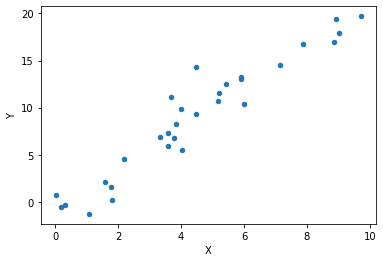

In [18]:
data = generate(30)
data.plot.scatter('X', 'Y')

So far, we've been using StatsModels formula interface.  That is syntax sugar on top of a lower-level matrix-based interface.  For this analysis, we will use that, because it's easier to programatically set up and manipulate.

The matrix interface requires us to construct an `OLS` instance with a $n \times 1$ array of *endogenous* (outcome) variables `Y`, and a $n \times k$ matrix of *exogenous* variables.  The rows are data points, and the columns of this matrix are predictor variables. If we want an intercept, it needs to be included as a predictor variable whose value is always 1 — the `sm.add_constant` function does this.

Let's set it up and fit the model:

In [36]:
X = sm.add_constant(data[['X']])
lin = sm.OLS(data['Y'], X)
lin = lin.fit()
lin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     317.7
Date:                Fri, 16 Oct 2020   Prob (F-statistic):           8.13e-17
Time:                        18:51:19   Log-Likelihood:                -59.322
No. Observations:                  30   AIC:                             122.6
Df Residuals:                      28   BIC:                             125.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7818      0.639     -1.223      0.231      -2.091       0.527
X              2.2016      0.124     17.824      0.000       1.949       2.455
==============================================================================
Omnibus:                        7.323   Durbin-Watson:                   1.736
Prob(Omnibus):                  0.026   Jarque-Bera (JB):                5.772
Skew:                           0.801   Prob(JB):                       0.0558
Kurtosis:                       4.431   Cond. No.                         10.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now let's fit a 4th-order polynomial model

$$\hat{y} = \beta_0 + \beta_1 x + \beta_2 x^2 + \beta_3 x^3 + \beta_4 x^4$$

We'll this by adding a constant to the `poly_expand` of the data frame, and fitting the model:

In [37]:
X = sm.add_constant(poly_expand(data['X']))
poly = sm.OLS(data['Y'], X)
poly = poly.fit()
poly.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     94.82
Date:                Fri, 16 Oct 2020   Prob (F-statistic):           9.90e-15
Time:                        18:52:06   Log-Likelihood:                -55.274
No. Observations:                  30   AIC:                             120.5
Df Residuals:                      25   BIC:                             127.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1426      1.135     -0.126      0.901      -2.479       2.194
X             -1.1816      1.803     -0.655      0.518      -4.896       2.532
X2             1.7365      0.805      2.157      0.041       0.079       3.394
X3            -0.2776      0.130     -2.144      0.042      -0.544      -0.011
X4             0.0138      0.007      2.027      0.053      -0.000       0.028
==============================================================================
Omnibus:                        5.714   Durbin-Watson:                   1.689
Prob(Omnibus):                  0.057   Jarque-Bera (JB):                4.196
Skew:                           0.622   Prob(JB):                        0.123
Kurtosis:                       4.345   Cond. No.                     1.98e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.98e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

And now the same with the 10th-order polynomial:

$$\hat{y} = \sum_{i=0}^{10} \beta_i x^i$$

In [38]:
X = sm.add_constant(poly_expand(data['X'], order=10))
poly10 = sm.OLS(data['Y'], X)
poly10 = poly10.fit()
poly10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     33.49
Date:                Fri, 16 Oct 2020   Prob (F-statistic):           5.98e-10
Time:                        18:53:18   Log-Likelihood:                -53.154
No. Observations:                  30   AIC:                             128.3
Df Residuals:                      19   BIC:                             143.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5949      2.061      0.289      0.776      -3.719       4.909
X             -1.1089     19.180     -0.058      0.954     -41.254      39.036
X2           -18.4133     51.012     -0.361      0.722    -125.182      88.355
X3            35.0879     60.911      0.576      0.571     -92.401     162.577
X4           -25.8969     39.040     -0.663      0.515    -107.608      55.814
X5            10.3116     14.824      0.696      0.495     -20.715      41.338
X6            -2.4437      3.495     -0.699      0.493      -9.759       4.872
X7             0.3545      0.517      0.686      0.501      -0.727       1.436
X8            -0.0309      0.047     -0.664      0.515      -0.128       0.066
X9             0.0015      0.002      0.636      0.532      -0.003       0.006
X10        -3.017e-05   4.97e-05     -0.607      0.551      -0.000    7.39e-05
==============================================================================
Omnibus:                        4.482   Durbin-Watson:                   1.745
Prob(Omnibus):                  0.106   Jarque-Bera (JB):                3.177
Skew:                           0.422   Prob(JB):                        0.204
Kurtosis:                       4.353   Cond. No.                     4.80e+11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.8e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Now let's plot the data and curves.  This time, I'm going to create a linspace, as usual, and then use the fitted model's `predict` function to generate the curves (this is easier than manually extracting and writing our own formula):

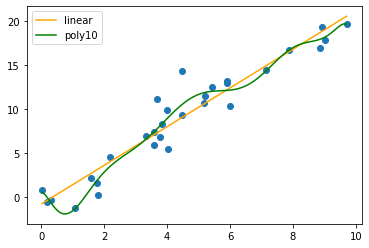

In [39]:
plt.scatter(data.X, data.Y)
xsp = np.linspace(np.min(data.X), np.max(data.X), 100)
# ysp = poly.predict(sm.add_constant(poly_expand(xsp)))
ysp10 = poly10.predict(sm.add_constant(poly_expand(xsp, order=10)))
ylp = lin.predict(sm.add_constant(xsp))
plt.plot(xsp, ylp, color='orange', label='linear')
# plt.plot(xsp, ysp, color='red', label='poly4')
plt.plot(xsp, ysp10, color='green', label='poly10')
plt.legend()
plt.show()

What are our squared errors on the training data?

In [23]:
np.mean(np.square(lin.resid))

3.0553433680686

In [24]:
np.mean(np.square(poly10.resid))

2.0253086976466195

## New Data


What about new points from our distribution?  Let's generate some:

In [25]:
test = generate(30)
test['LinP'] = lin.predict(sm.add_constant(test[['X']]))
test['LinErr'] = test['Y'] - test['LinP']
test['Poly10P'] = poly10.predict(sm.add_constant(poly_expand(test.X, 10)))
test['Poly10Err'] = test['Y'] - test['Poly10P']

And compute our *test error* for each model:

In [26]:
np.mean(np.square(test['LinErr']))

2.992713620832882

In [27]:
np.mean(np.square(test['Poly10Err']))

4.382587964880173

And plot the new points, along wiht the old points and our model:

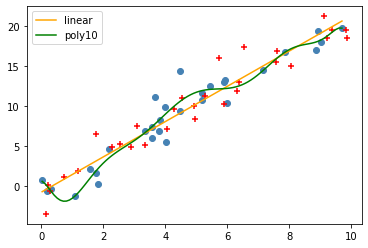

In [35]:
plt.scatter(data.X, data.Y, color='steelblue')
plt.scatter(test.X, test.Y, color='red', marker='+')
xsp = np.linspace(np.min(data.X), np.max(data.X), 100)
# ysp = poly.predict(sm.add_constant(poly_expand(xsp)))
ysp10 = poly10.predict(sm.add_constant(poly_expand(xsp, order=10)))
ylp = lin.predict(sm.add_constant(xsp))
plt.plot(xsp, ylp, color='orange', label='linear')
# plt.plot(xsp, ysp, color='red', label='poly4')
plt.plot(xsp, ysp10, color='green', label='poly10')
plt.legend()
plt.show()